# REAL TIME DIGIT RECOGNITION FOR SINGLE DIGITS- Working

In [1]:
#Importing Libraries
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Before going to real time testing lets test normally

In [2]:
#import model and check summary 

model = tf.keras.models.load_model('trained_model')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

<class 'numpy.ndarray'>


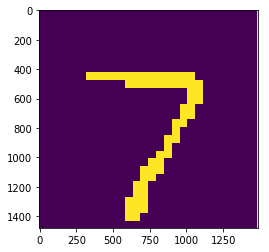

In [3]:
# Get a testing image and preprocess it

def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

img = cv2.imread("test\\7.png")
print(type(img))

imgPred=preProcess(img)
imgPred.shape
plt.imshow(imgPred)

In [4]:
# Resize and reshape image to feed into the model

imgPred=cv2.resize(imgPred,(32,32))
imgPred=imgPred.reshape((1,32,32,1))

In [5]:
# Predict

p=model.predict_classes(imgPred)
print("Predition is : "+str(p[0]))

Predition is : 7


## Hence our model is predicting and recognizing the image

## Now lets start Real time detection by setting up the camera

In [6]:
videocapture = cv2.VideoCapture(0)
videocapture.set(3,720)
videocapture.set(4,540)

True

# Now in an infinite loop we will run camera and detect

In [7]:
threshold = 0.65 # Minimum probability for classification
while True:
    ret, imgOrg = videocapture.read()
    img = preProcess(imgOrg)
    img = cv2.resize(img,(32,32))
    img = img.reshape(1,32,32,1)
    
    # Lets Predict
    
    classlabel = int(model.predict_classes(img))
    #print(classlabel)
    predictions = model.predict(img)
    #print(predictions)
    probVal= np.amax(predictions)
    #print(classlabel,probVal)

    if(probVal>threshold):
        cv2.putText(imgOrg,str(classlabel) + "   "+str(probVal),
                    (50,50),cv2.FONT_HERSHEY_SIMPLEX,
                    1,(255,0,0),1)
    cv2.imshow("Original Img",imgOrg)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

# Lets see the outputs generated

![output5](https://user-images.githubusercontent.com/42001739/82623649-4af83380-9bfe-11ea-96e3-aac5efa0232f.PNG)
![output](https://user-images.githubusercontent.com/42001739/82623652-4b90ca00-9bfe-11ea-8ddd-cf9df7a5bc0a.PNG)
![output2](https://user-images.githubusercontent.com/42001739/82623656-4c296080-9bfe-11ea-9412-01871fb03f01.PNG)
![output3](https://user-images.githubusercontent.com/42001739/82623657-4cc1f700-9bfe-11ea-8010-02353a8fc810.PNG)
![output4](https://user-images.githubusercontent.com/42001739/82623646-492e7000-9bfe-11ea-9133-b61b6fa32adb.PNG)

# Hence the model is giving very good results

## Now lets try adding Bounded Boxes

In [8]:
def boundedboxProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=255-img
    return img

img = cv2.imread("test\\6.png")
print(type(img))

imgbox=boundedboxProcess(img)

<class 'numpy.ndarray'>


In [9]:
contours0, hierarchy = cv2.findContours(imgbox.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

## Lets plot the contours

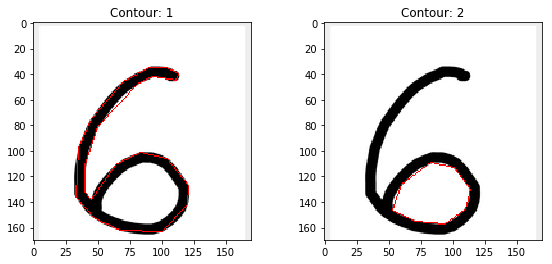

In [10]:
plt.figure(figsize=(20,4))
for i in range(len(contours)):
        img_gray_cont=cv2.drawContours(img.copy(), contours, i,255, 1)
        plt.subplot((len(contours)//4)+1,4,i+1)
        plt.title('Contour: {}'.format(i+1))
        plt.imshow(img_gray_cont,cmap='gray')
plt.show()

In [11]:
countours_largest = sorted(contours, key=lambda x: cv2.contourArea(x))[-1]
bb=cv2.boundingRect(countours_largest)
print(bb)

(33, 35, 89, 129)


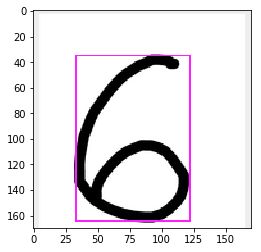

In [12]:
# pt1 and pt2 are terminal coordinates of the diagonal of the rectangle
color = (255,30,255)
pt1=(bb[0],bb[1]) # upper coordinates 
pt2=(bb[0]+bb[2],bb[1]+bb[3]) # lower coordinates
img_bb=img.copy()
cv2.rectangle(img_bb,pt1,pt2,color,1)
# cv2.rectangle()
plt.imshow(img_bb,cmap='gray')
plt.show()

## Hence we created a Box around the image now lets try adding this to real time

# Firstly lets create a function for what we did above

In [13]:
#Function to plot boxes on images
def drawbox(imgo):
    img=boundedboxProcess(imgo)
    contours0, hierarchy = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]
    countours_largest = sorted(contours, key=lambda x: cv2.contourArea(x))[-1]
    bb=cv2.boundingRect(countours_largest)
    color = (255,30,255)
    pt1=(bb[0],bb[1]) # upper coordinates 
    pt2=(bb[0]+bb[2],bb[1]+bb[3]) # lower coordinates
    img_bb=imgo.copy()
    cv2.rectangle(img_bb,pt1,pt2,color,1)
    return img_bb
    

In [14]:
# Setting up the videocapture again

videocapture = cv2.VideoCapture(0)
videocapture.set(3,720)
videocapture.set(4,540)

True

In [15]:
threshold = 0.65 # Minimum probability for classification
while True:
    ret, imgOrg = videocapture.read()
    img = preProcess(imgOrg)
    nimg=drawbox(imgOrg)
    img = cv2.resize(img,(32,32))
    img = img.reshape(1,32,32,1)
    
    # Lets Predict
    
    classlabel = int(model.predict_classes(img))
    #print(classlabel)
    predictions = model.predict(img)
    #print(predictions)
    probVal= np.amax(predictions)
    #print(classlabel,probVal)

    if(probVal>threshold):
#         cv2.putText(imgOrg,str(classlabel) + "   "+str(probVal),
#                     (50,50),cv2.FONT_HERSHEY_SIMPLEX,
#                     1,(255,0,0),1)
          cv2.putText(nimg,str(classlabel) + "   "+str(probVal),
                    (150,50),cv2.FONT_HERSHEY_SIMPLEX,
                    1,(255,0,0),1)        
    cv2.imshow("Original Img",nimg)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

![rt2](https://user-images.githubusercontent.com/42001739/82623768-901c6580-9bfe-11ea-9b3c-1bc63e176300.png)
![rt1](https://user-images.githubusercontent.com/42001739/82623770-914d9280-9bfe-11ea-8bd3-0e986ac54835.png)


## Hence we see it detects the image as well as gives a box



## Improvements needed

-Make the bounded box accurate